Use iris flower dataset from sklearn library and use cross_val_score against following models to measure the performance of each. In the end figure out the model with best performance,

Logistic Regression <br>
SVM <br>
Decision Tree <br>
Random Forest <br>

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
import numpy as np
iris = load_iris()

In [6]:
X = iris.data
Y = iris.target

In [9]:
lr = cross_val_score(LogisticRegression(max_iter=1000), X, Y, cv=5)
np.mean(lr)

0.9733333333333334

In [10]:
svm = cross_val_score(SVC(), X, Y, cv=5)
np.mean(svm)

0.9666666666666666

In [11]:
dtc = cross_val_score(DecisionTreeClassifier(), X, Y, cv=5)
np.mean(dtc)

0.9600000000000002

In [13]:
rfc = cross_val_score(RandomForestClassifier(n_estimators=40), X, Y, cv=5)
np.mean(rfc)

0.9666666666666668

Best model for the data is Logistic Regression

Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.<br>
Figure out if any preprocessing such as scaling would help here <br>
Draw elbow plot and from that figure out optimal value of k <br>

In [25]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [8]:
df1 = pd.DataFrame(iris.data, columns=iris.feature_names)
df1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
df1 = df1.drop(["sepal length (cm)","sepal width (cm)"], axis=1)
df1

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [15]:
scaler = MinMaxScaler()
df1[["petal length (cm)"]] = scaler.fit_transform(df1[["petal length (cm)"]])
df1[["petal width (cm)"]] = scaler.fit_transform(df1[["petal width (cm)"]])
df1

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667
...,...,...
145,0.711864,0.916667
146,0.677966,0.750000
147,0.711864,0.791667
148,0.745763,0.916667


In [30]:
sse = []
k_range = range(1, 11)
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df1[["petal length (cm)"]], df1[["petal width (cm)"]])
    sse.append(km.inertia_)
sse

[13.338850904912379,
 1.9420778923288344,
 0.7142458500205597,
 0.36131890580612214,
 0.25342136375103563,
 0.1708240498996331,
 0.12192083068998748,
 0.09795761083244979,
 0.07272838573689153,
 0.06075359871767258]

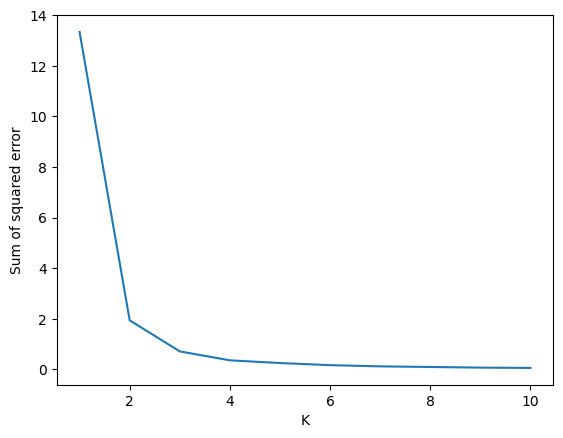

In [31]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range,sse)

Here, the elbow is 3.

In [34]:
km = KMeans(n_clusters=3)
yp = km.fit_predict(df1[["petal length (cm)"]], df1[["petal width (cm)"]])
yp

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [35]:
df1["cluster"] = yp
df1

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0
...,...,...,...
145,0.711864,0.916667,1
146,0.677966,0.750000,1
147,0.711864,0.791667,1
148,0.745763,0.916667,1


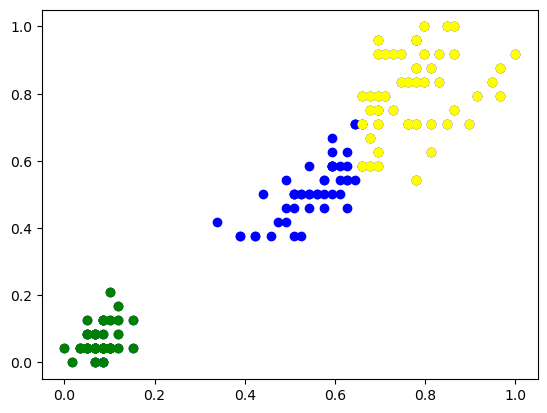

In [36]:
df2 = df1[df1["cluster"]==0]
df3 = df1[df1["cluster"]==1]
df4 = df1[df1["cluster"]==2]
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='yellow')